<a href="https://colab.research.google.com/github/tseringj/Face_Recognition/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir known
!mkdir unknown

In [ ]:
pip install face_recognition

Processing: 3.jpg


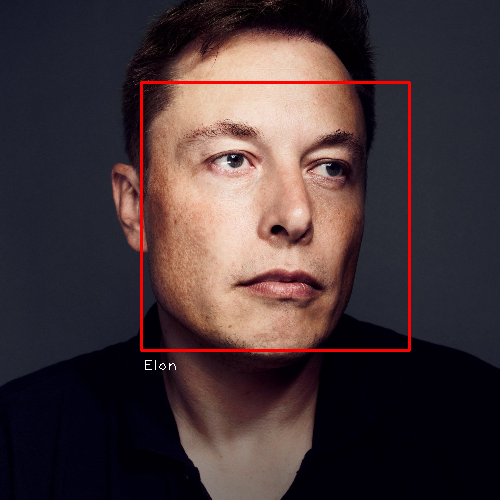

Processing: 2.jpg


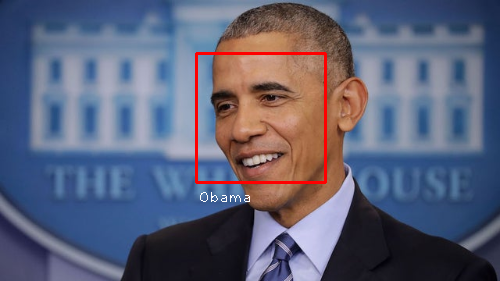

Processing: 4.jpg
Processing: 1.jpg


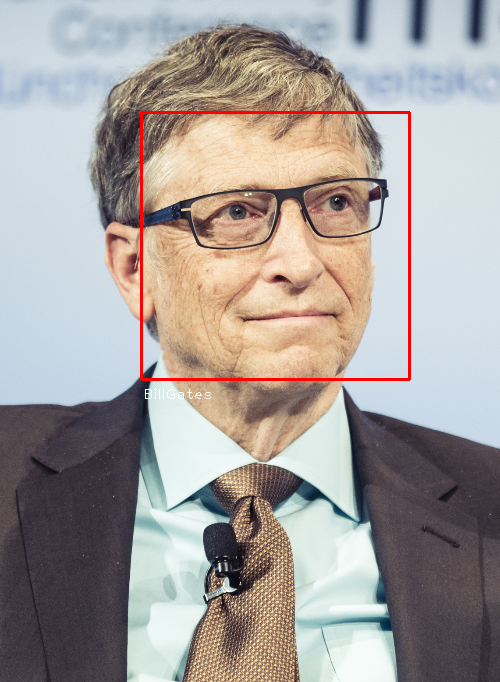

In [8]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
  img = cv2.imread(path)
  (h,w) = img.shape[:2]
  width = 500
  ratio = width/ float(w)
  height = int(h * ratio)
  return cv2.resize(img,(width,height))
known_encodings = []
known_name = []
#known encoding
known_dir = 'known'
for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_name.append(file.split('.')[0])

#known_encodings
#unknown encoding
unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
  print("Processing:",file)
  img = read_img(unknown_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  
  results = face_recognition.compare_faces(known_encodings,img_enc)

  for i in range(len(results)):
    if results[i]:
      name = known_name[i]
      (top,right,bottom,left) = face_recognition.face_locations(img)[0]
      cv2.rectangle(img,(left,top),(right,bottom),(0,0,255),2)
      cv2.putText(img,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN,1,(255,255,255),1)
      cv2_imshow(img)
    
  #print(results)
